In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import datetime as dt
import os
from matplotlib.backends.backend_pdf import PdfPages
import statistics
import scipy.stats as stats
import math
import tensorflow as tf

In [42]:
# Importing the Dataset
file_names = glob.glob ('./EthernetData/dataset5.csv')
k = 0

# Change these two variables to get different results
#degree change
n = 1
#operating state
op_state = 'Heating'
exclude_state = 'Cooling'
# op_state = 'Cooling'
# exclude_state = 'Heating'

In [43]:
# Given millisecond utc timestamp return time
def tz_from_utc_ms_ts(utc_ms_ts):
    
    # convert from time stamp to datetime
    utc_datetime = dt.datetime.utcfromtimestamp(utc_ms_ts / 1000.)
    
    # getting time from datetime object
    res = utc_datetime.hour + utc_datetime.minute / 60
    if res - 5 < 0:
        res = 24 + (res - 5)
    else:
        res = res - 5
    return res

In [44]:
# Visualising the result as time of day vs cooling time of machine
def plot (time_difference, y, temp_change):
    fig = plt.figure (k)
    ax = plt.subplot ()
    plt.bar (y, time_difference, 0.05, align = 'center', alpha = 1)
    plt.xlabel ('Time of day')
    plt.ylabel ('Time taken for ' + op_state + ' ' + str (temp_change) + ' Degree (in Minutes)')
    ax.set_xticks ([0,5,10,15,20,24])
    ax.set_xticklabels (['00:00', '05:00', '10:00', '15:00', '20:00', '00:00'])
    plt.title (os.path.basename (path))
    plt.show ()
    pp.savefig (fig)
    plt.close (fig)

In [45]:

# Finding time required for temparature change...
import json
def time_to_change_temperature (X, temp_change):
    # Time to cool one degree in minutes
    time_difference = []
    # Factor represts temparature change between cooling/heating on and off.
    factor = 1
    y = []
    curr_temp = 0
    i = 0
    avg_time_to_change = 0
    while i < len(X):
        content = json.loads (X.content[i])
        if 'status' in content and "room_temp" in content["status"]:
            curr_temp = content["status"]["room_temp"]
        
        if 'status' in content and "operating_state" in content["status"] and content["status"]["operating_state"] in [op_state] :
            curr_index = i
            
            hh = tz_from_utc_ms_ts(X.created_date_time[i])
            while i < len(X):
                content = json.loads (X.content[i])
                if 'status' in content and "room_temp" in content["status"]:
                    if(op_state == "Cooling"):
                        factor = curr_temp - content["status"]["room_temp"]
                    else:
                        factor =  content["status"]["room_temp"] - curr_temp
                    
                    if( factor == temp_change):
                      print(i+1, curr_temp, content["status"]["room_temp"])
                      diff = abs((X.created_date_time[i] - X.created_date_time[curr_index])/(60000))
                      time_difference.append (diff)
                      avg_time_to_change = avg_time_to_change + (diff)
                      y.append(hh)
                      break
                if 'status' in content and "operating_state" in content["status"] and content["status"]["operating_state"] in ["Off", exclude_state, "Fan_Only"]:
                    break
                i=i+1

        i=i+1       
    # print((time_difference))
    if (time_difference):
        mean = (avg_time_to_change/ len(time_difference))
        sd = statistics.stdev(time_difference)
        print('average time to ' + op_state + ' ' + str(temp_change) +'F: ', mean)
        print('Standard deviation ', sd)
    plot (time_difference, y, temp_change) 
    # time_difference.sort()
    # pdf1 = stats.norm.pdf(time_difference, (avg_time_to_change/ len(time_difference)), statistics.stdev(time_difference))
    # plt.plot(time_difference, pdf1)
    return (mean)

121 62 63
124 63 64
144 66 67
168 67 68
177 67 68
186 67 68
193 67 68
202 67 68
209 67 68
227 67 68
264 67 68
271 67 68
280 67 68
287 67 68
296 67 68
307 68 69
311 69 70
338 69 70
349 69 70
357 69 70
364 69 70
371 69 70
378 69 70
385 69 70
429 69 70
438 69 70
445 69 70
452 69 70
461 69 70
468 69 70
476 69 70
488 69 70
517 69 70
524 69 70
533 69 70
540 69 70
713 59 60
726 59 60
770 59 60
781 59 60
790 59 60
799 59 60
847 59 60
858 59 60
872 59 60
883 59 60
894 59 60
903 59 60
912 59 60
921 59 60
932 59 60
941 59 60
950 59 60
960 59 60
971 59 60
984 59 60
993 59 60
1002 59 60
1013 59 60
1024 59 60
1035 59 60
1045 59 60
1068 59 60
1079 59 60
1089 59 60
1098 59 60
1109 59 60
1118 59 60
1128 59 60
1139 59 60
1150 59 60
1161 59 60
1170 59 60
1188 59 60
1197 59 60
1206 59 60
1215 59 60
1247 59 60
1258 59 60
1267 59 60
1276 59 60
1285 59 60
1325 59 60
1334 59 60
1343 59 60
1354 59 60
1397 59 60
1406 59 60
1415 59 60
1426 59 60
1435 59 60
1473 59 60
1484 59 60
1495 59 60
1504 59 60
1514 59 60
1

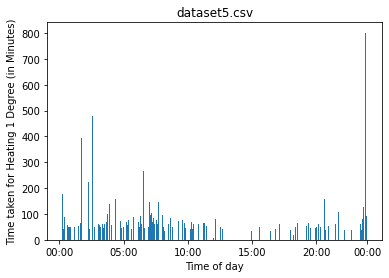

124 62 64
145 66 68
311 68 70
average time to Heating 2F:  63.73758888888889
Standard deviation  44.76417640309397


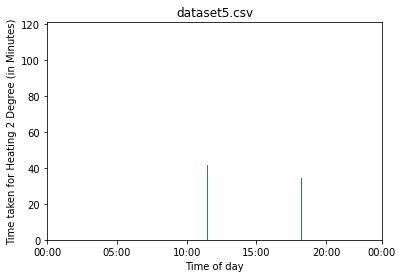

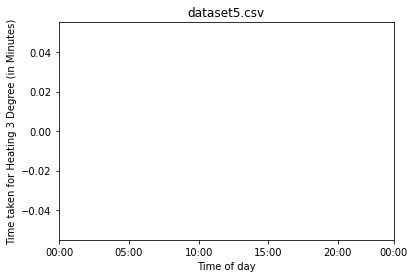

UnboundLocalError: local variable 'mean' referenced before assignment

In [46]:
path = ''
pp = PdfPages ('./Plot' + str (n) + '.pdf')

for file_name in file_names:
    try:
      path = file_name
      dataset = pd.read_csv ((path))
    except:
      continue
    
    X = dataset.iloc[:, :]

    avg1 = time_to_change_temperature(X, 1)
    avg2 = time_to_change_temperature(X, 2)
    avg3 = time_to_change_temperature(X, 3)
    avg4 = time_to_change_temperature(X, 4)
    avg = (avg1 + avg2/2 + avg3/3 + avg4/4) / 4

    print('Average time to heat 1F ', avg)
    print(' standard deviation ', statistics.stdev([avg1, avg2/2, avg3/3, avg4/4]))

pp.close ()

In [ ]:
dataset